卷積神經網路(Convolutional neural network, CNN)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()


In [0]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [0]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]


飛機


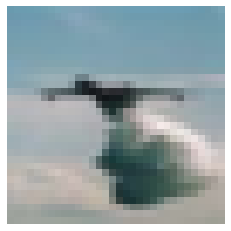

In [0]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [0]:
"""
資料預處理
1. 題目預處理(Normalize)
   keras在準備隨機那組weights，跟Normalize的圖片較搭
   第一種方式: 0 ~ 1，在這裡用此方式
   第二種方式: -1 ~ 1
   卷積不需要攤開，直接進去
"""

x_train_shape = x_train / 255
x_test_shape = x_test / 255

# Demo
x_train_shape[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [0]:
"""
2. 答案預處理(One-hot encoding)
   希望的樣子:[P0, P1, ..., P9]
   ex. 5: 可能輸出 -> [0, 0, 0, 0.2, 0, 0.8, 0, 0, 0, 0]
"""

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Demo
print("原來：",y_train[0])
print("後來：",y_train_cat[0])


原來： [6]
後來： [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
"""
建立模型
   第一種:蛋糕支架(Sequential), 堆上一層(Layers)
   Layers: Dense(全連接層)
"""

from tensorflow.keras.models import Sequential

# MLP
from tensorflow.keras.layers import Dense, Flatten

# Convolution
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn = Sequential()
# (一個filter) 3 * 3 * 3 * (filter數目)32 + (bias)32 = 896
cnn.add(Conv2D(32, (3, 3), 
               input_shape=(32, 32, 3), 
               padding="same", 
               activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

# (一個filter) 3 * 3 * 32 * (filter數目)64 + (bias)64 = 18496
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

# (一個filter) 3 * 3 * 64 * (filter數目)128 + (bias)128 = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
"""
確定模型訓練方式...等
   隨機(隨便選一組Weights)梯度(正確方向)下滑
   loss: 最後輸出一個 -> binary_crossentropy
         最後輸出多個 -> categorical_crossentropy
   metrics: 為多輸出的項目(accuracy正確率)，以供參考
   optimizer: 下降的時候優化 -> 基於動量(在走的時候不是等速度，而是有速度的累積)
"""

cnn.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"], 
            optimizer="adam")


In [0]:
"""
訓練模型
   batch: 看幾筆(200)做一次梯度下降(修正)
   epochs: 整份測試集看幾次(10)
   10個epochs，200 batch: 50000 * 10 / 200 -> 3000(次梯度下降)
   verbose=2 -> 不印進度條
"""

cnn.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=10, 
        validation_split=0.1, 
        verbose=2)


Epoch 1/5
225/225 - 4s - loss: 0.7343 - accuracy: 0.7457 - val_loss: 0.7772 - val_accuracy: 0.7388
Epoch 2/5
225/225 - 4s - loss: 0.6642 - accuracy: 0.7712 - val_loss: 0.8362 - val_accuracy: 0.7134
Epoch 3/5
225/225 - 4s - loss: 0.6012 - accuracy: 0.7918 - val_loss: 0.7792 - val_accuracy: 0.7436
Epoch 4/5
225/225 - 4s - loss: 0.5462 - accuracy: 0.8120 - val_loss: 0.7929 - val_accuracy: 0.7374
Epoch 5/5
225/225 - 4s - loss: 0.4870 - accuracy: 0.8315 - val_loss: 0.7739 - val_accuracy: 0.7458


In [0]:
"""
evaluate評估函式
"""

cnn.evaluate(x_test_shape, y_test_cat)


313/313 [==============================] - 2s 5ms/step - loss: 0.8120 - accuracy: 0.7353


[0.8119717240333557, 0.7353000044822693]

In [0]:
"""
混淆矩陣
"""

import pandas as pd

# predict: 機率 、 predict_classes: 分類
# trans = ["飛機", "汽車", "鳥", "貓", "鹿", 
#          "狗", "青蛙", "馬", "船", "卡車"]
pre = cnn.predict_classes(x_test_shape)

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0,1,2,3,4,5,6,7,8,9
0,776,21,31,17,20,6,4,9,68,48
1,11,870,3,6,4,1,1,3,14,87
2,69,9,561,99,109,46,40,28,18,21
3,23,17,35,639,75,96,30,37,14,34
4,23,6,45,67,719,20,25,66,15,14
5,16,9,28,219,48,572,15,61,10,22
6,11,13,46,85,48,15,748,10,9,15
7,22,6,31,47,53,36,4,773,2,26
8,51,35,5,14,4,6,0,4,853,28
9,26,77,6,13,2,3,0,6,25,842


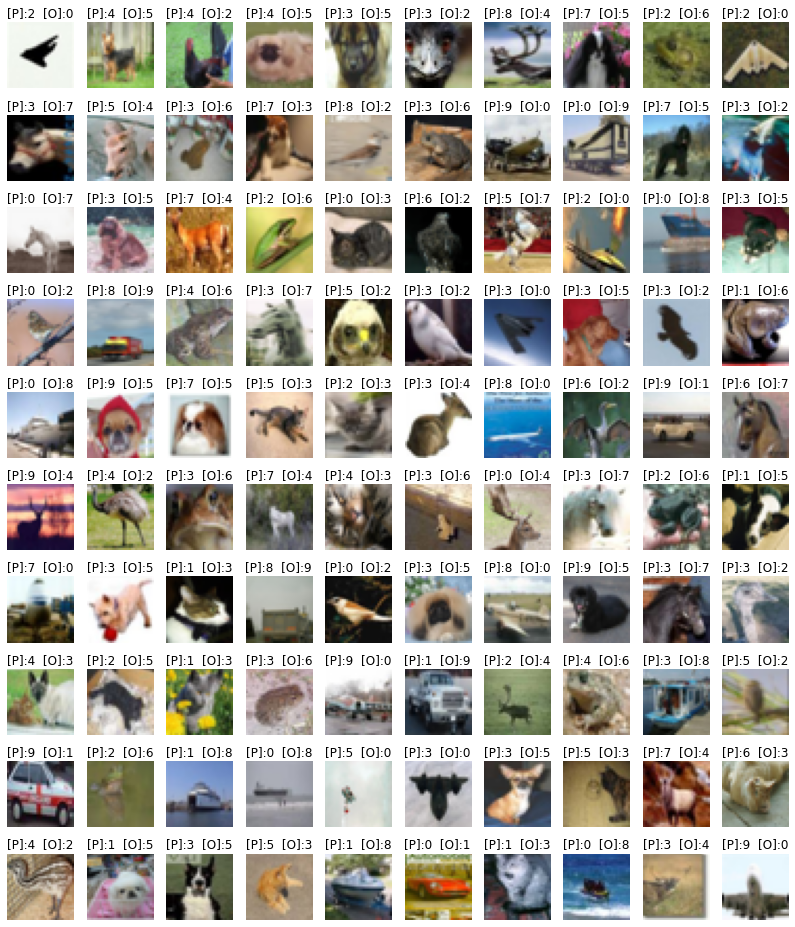

In [0]:
# numpy才能這樣直接每個數字比較
import numpy as np

# list: list[索引]
# numpy array: nparray[ [多個數字] ]
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]

# 預測錯誤的圖之原本標籤
orifalse = y_dim[diff]

# 預測錯誤的圖之預測標籤
prefalse = pre[diff]

# 把圖拿出來
imgfalse = x_test[diff]

# 整張圖的 寬, 高
plt.figure(figsize=(14, 450))

# 設定subplot在整張圖的 寬/高 layout分佈 
width = 10
height = int(len(imgfalse) / 10) + 1

for i, img in enumerate(imgfalse[0:100]):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[P]:" + str(prefalse[i]) + "  [O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)
